# *k*-NN Classifier

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import sys

from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
athlete = pd.read_csv('D:\\Resolve6_Training\\DS_ML\\Sample Data Sets\\AthleteSelection.csv',index_col = 'Athlete')
athlete.head()

,Speed,Agility,Selected
Athlete,,,
x1,2.50,6.00,No
x2,3.75,8.00,No
x3,2.25,5.50,No
x4,3.25,8.25,No
x5,2.75,7.50,No


In [2]:
names = athlete.index
names

Index(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11',
       'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20'],
      dtype='object', name='Athlete')

#### Store features and labels in numpy arrays X and y
`X` is a numpy array containing the training features.  
`y` contains the class labels.   
`q` is a query example.

In [3]:
y = athlete.pop('Selected').values
X = athlete.values
q = [5.0,7.5]

#### Plot the data

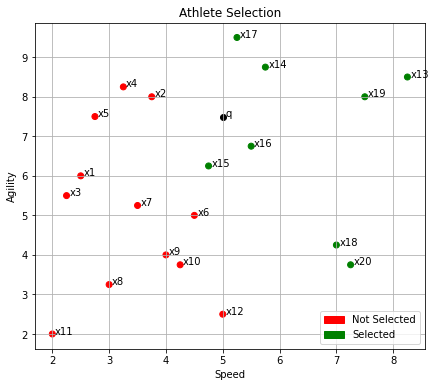

In [4]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

color= ['red' if l == 'No' else 'green' for l in y]
x1 = X[:,0]
x2 = X[:,1]
plt.figure(figsize=(7,6))
plt.scatter(x1,x2, color=color)
plt.scatter(q[0],q[1],color='black')
plt.annotate('q',(q[0]+0.05,q[1]))
plt.title("Athlete Selection")
plt.xlabel("Speed")
plt.ylabel("Agility")
plt.grid()
red_patch = mpatches.Patch(color='red', label='Not Selected')
blue_patch = mpatches.Patch(color='green', label='Selected')
plt.legend(handles=[red_patch, blue_patch],loc=4)
for i, txt in enumerate(names):
    plt.annotate(txt, (x1[i]+0.05, x2[i]))

In [5]:
#Data Normalization
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)
q_scaled = scaler.transform([q])
q_scaled

array([[0.22330171, 0.75770254]])

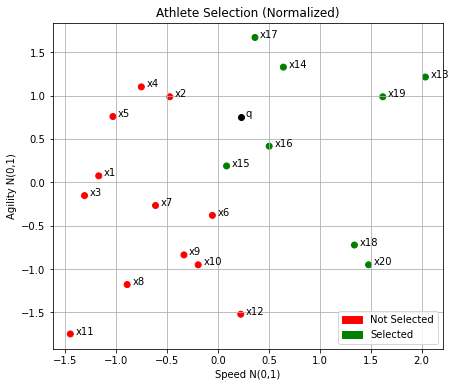

In [6]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
color= ['red' if l == 'No' else 'green' for l in y]
x1 = X_scaled[:,0]
x2 = X_scaled[:,1]
plt.figure(figsize=(7,6))
plt.scatter(x1,x2, color=color)
plt.scatter(q_scaled[0,0],q_scaled[0,1],color='black')
plt.annotate('q',(q_scaled[0,0]+0.05,q_scaled[0,1]))
plt.title("Athlete Selection (Normalized)")
plt.xlabel("Speed N(0,1)")
plt.ylabel("Agility N(0,1)")
plt.grid()
red_patch = mpatches.Patch(color='red', label='Not Selected')
blue_patch = mpatches.Patch(color='green', label='Selected')
plt.legend(handles=[red_patch, blue_patch],loc=4)
for i, txt in enumerate(names):
    plt.annotate(txt, (x1[i]+0.05, x2[i]))

#### Finding Neighbours
Find the first two NNs for `q`.

In [7]:
athlete_neigh = NearestNeighbors(n_neighbors=2)
athlete_neigh.fit(X_scaled) 

NearestNeighbors(n_neighbors=2)

The distances and the indexes of the two NNs for `q`.

In [8]:
athlete_neigh.kneighbors(q_scaled, 2, return_distance=True)

(array([[0.44130868, 0.58654701]]), array([[15, 14]], dtype=int64))

The three NNs for `q`

In [9]:
# Find three nearest neighbours for q
q3n = athlete_neigh.kneighbors(q_scaled, 3)[1][0]
# q3n contains the 'index' of the nearest neighbours
for n in q3n:
    print(names[n], end = ' ')

x16 x15 x14 

## *k*-NN Classifier
Use `KNeighboursClassifier` to build a *k*-NN classifier.
Two methods:
- `fit` sets up the classifier with the training data, takes two arguments, the features and the labels. 
- `predict` produces the output for the test set (just one test example in this case).


In [10]:
kNN = KNeighborsClassifier(n_neighbors = 3)
kNN = kNN.fit(X_scaled,y)

In [11]:
kNN.predict(q_scaled)

array(['Yes'], dtype=object)